In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [409]:
df = pd.read_csv("extinction-threat-to-indigenous-land-species.csv")

In [410]:
df.head()

,report_name,common_name,m_ori_name,species_name,category,subcategory,status_change,subcategory_change,assessment_id,report_id,...,cd,data_poor,native_resident_living,conservation_dependent,report,report_group,domain,report_group_year,report_group_comprehensive,population_trend
0,Macroalgae 2019 (Nelson et al. 2019),Red seaweed,NaN,Bangia 1,Data deficient,Data deficient,No change,No change,142794,52,...,NaN,NaN,True,False,Macroalgae 2019,Macroalgae,Marine,Macroalgae (2019),False,Not available
1,Macroalgae 2019 (Nelson et al. 2019),Red seaweed,NaN,Bangia 1,Data deficient,Data deficient,New listing,New listing,108377,52,...,NaN,NaN,True,False,Macroalgae 2019,Macroalgae,Marine,Macroalgae (2019),False,Not available
2,Macroalgae 2019 (Nelson et al. 2019),Red seaweed,NaN,Bangia 1,Data deficient,Data deficient,New listing,New listing,108381,52,...,NaN,NaN,True,False,Macroalgae 2019,Macroalgae,Marine,Macroalgae (2019),False,Not available
3,Macroalgae 2019 (Nelson et al. 2019),Red seaweed,NaN,Bangia 1,Data deficient,Data deficient,New listing,New listing,108382,52,...,NaN,NaN,True,False,Macroalgae 2019,Macroalgae,Marine,Macroalgae (2019),False,Not available
4,Macroalgae 2019 (Nelson et al. 2019),Red seaweed,NaN,Bangia 1,Data deficient,Data deficient,New listing,New listing,108383,52,...,NaN,NaN,True,False,Macroalgae 2019,Macroalgae,Marine,Macroalgae (2019),False,Not available


In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11861 entries, 0 to 11860
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_name                 11861 non-null  object 
 1   common_name                 8734 non-null   object 
 2   m_ori_name                  700 non-null    object 
 3   species_name                11861 non-null  object 
 4   category                    11861 non-null  object 
 5   subcategory                 11861 non-null  object 
 6   status_change               9469 non-null   object 
 7   subcategory_change          9420 non-null   object 
 8   assessment_id               11861 non-null  int64  
 9   report_id                   11861 non-null  int64  
 10  species_id                  11861 non-null  int64  
 11  genus                       11861 non-null  object 
 12  family                      11861 non-null  object 
 13  order                       118

In [412]:
df.describe()

,assessment_id,report_id,species_id,time_span_years
count,11861.000000,11861.000000,11861.000000,209.000000
mean,52936.729028,168.719248,21530.020403,12.143541
std,34974.387199,343.208529,13058.663511,10.334244
min,15733.000000,15.000000,699.000000,10.000000
25%,31338.000000,33.000000,8804.000000,10.000000
50%,38343.000000,38.000000,27155.000000,10.000000
75%,63019.000000,55.000000,32274.000000,10.000000
max,151728.000000,1093.000000,47390.000000,120.000000


In [413]:
#for col in df.columns:
    #print(f"\n--- {col} ---")
    #print(df[col].unique())

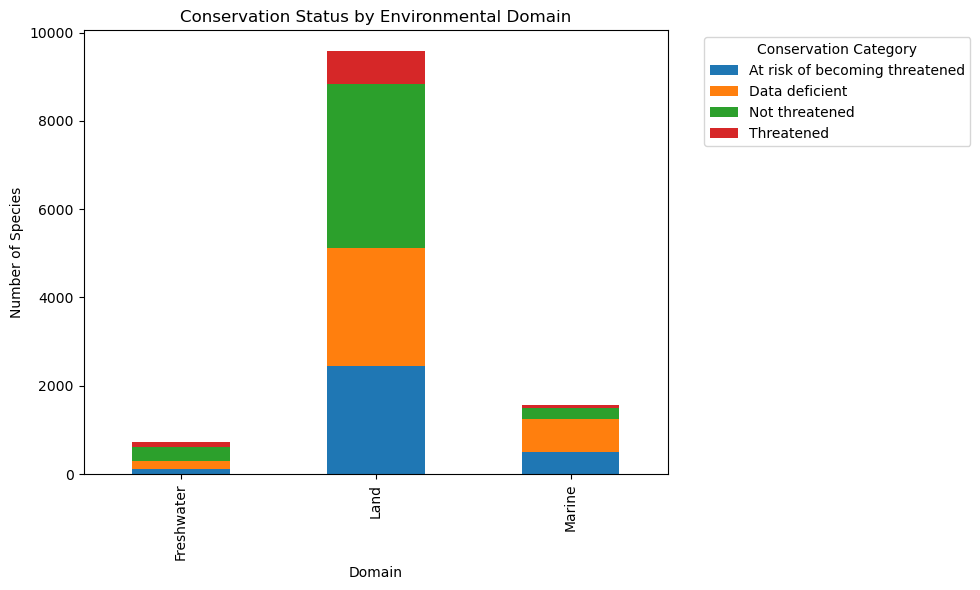

In [414]:
domain_summary = df.groupby(['domain', 'category']).size().unstack().fillna(0)

domain_summary.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Conservation Status by Environmental Domain")
plt.xlabel("Domain")
plt.ylabel("Number of Species")
plt.legend(title="Conservation Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

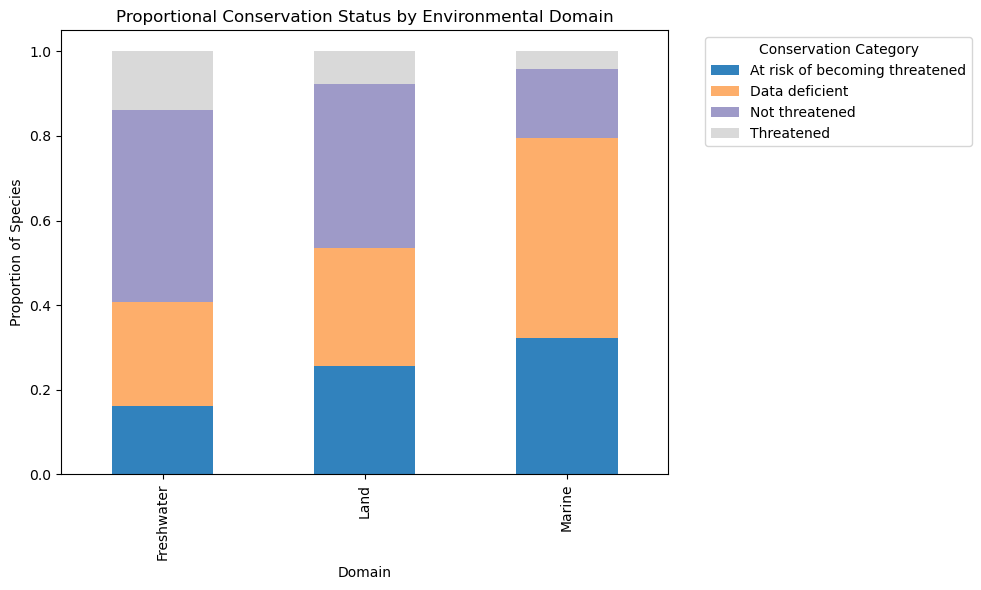

In [415]:
#group by domain (where the species is from) and category (broad threat level)
domain_summary = df.groupby(['domain', 'category']).size().unstack().fillna(0)

domain_proportions = domain_summary.div(domain_summary.sum(axis=1), axis=0)

domain_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
plt.title("Proportional Conservation Status by Environmental Domain")
plt.xlabel("Domain")
plt.ylabel("Proportion of Species")
plt.legend(title="Conservation Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

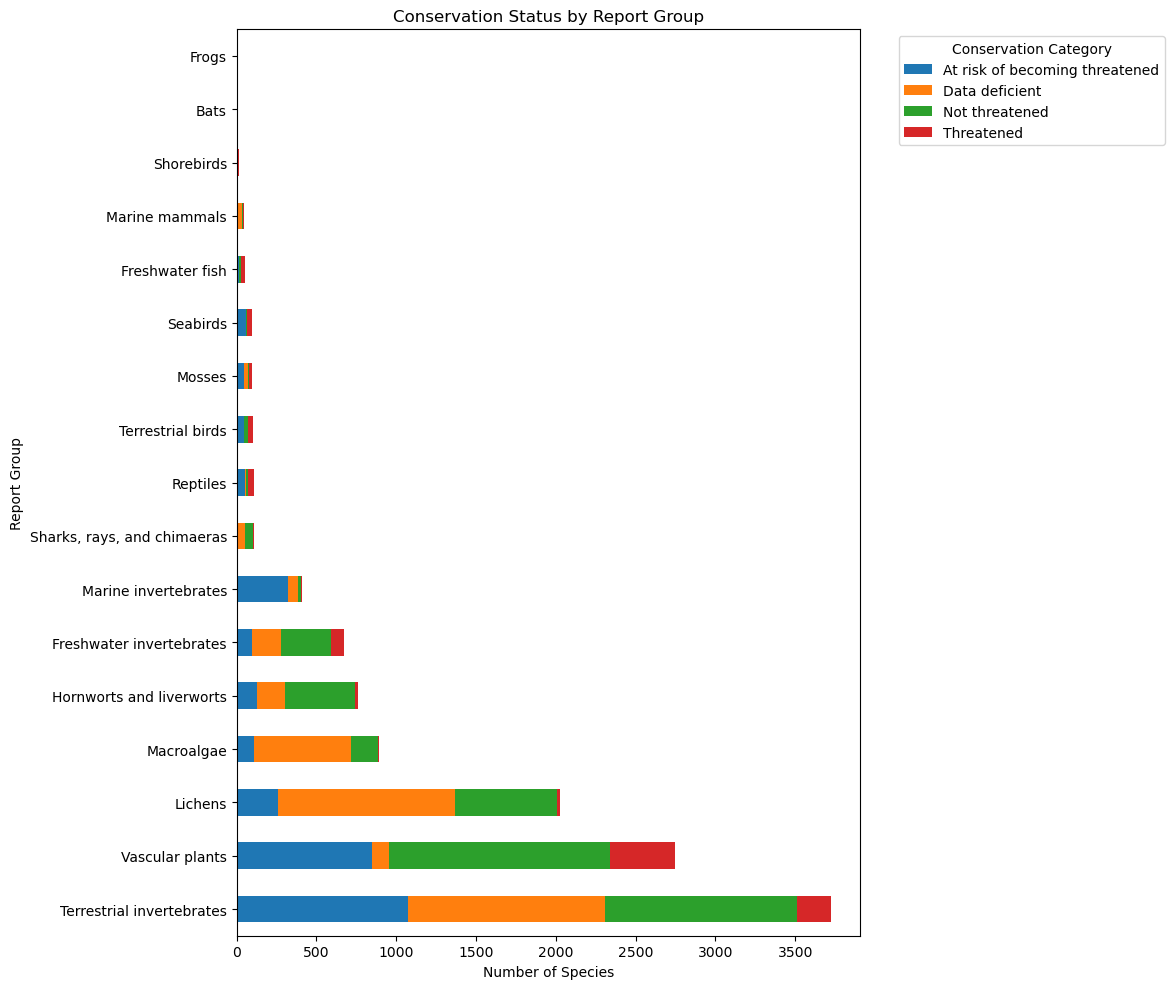

In [416]:
# Group by report group and conservation category
group_summary = df.groupby(['report_group', 'category']).size().unstack().fillna(0)

# Sort by total species per group
group_summary = group_summary.loc[group_summary.sum(axis=1).sort_values(ascending=False).index]

group_summary.plot(kind='barh', stacked=True, figsize=(12, 10))
plt.title("Conservation Status by Report Group")
plt.xlabel("Number of Species")
plt.ylabel("Report Group")
plt.legend(title="Conservation Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

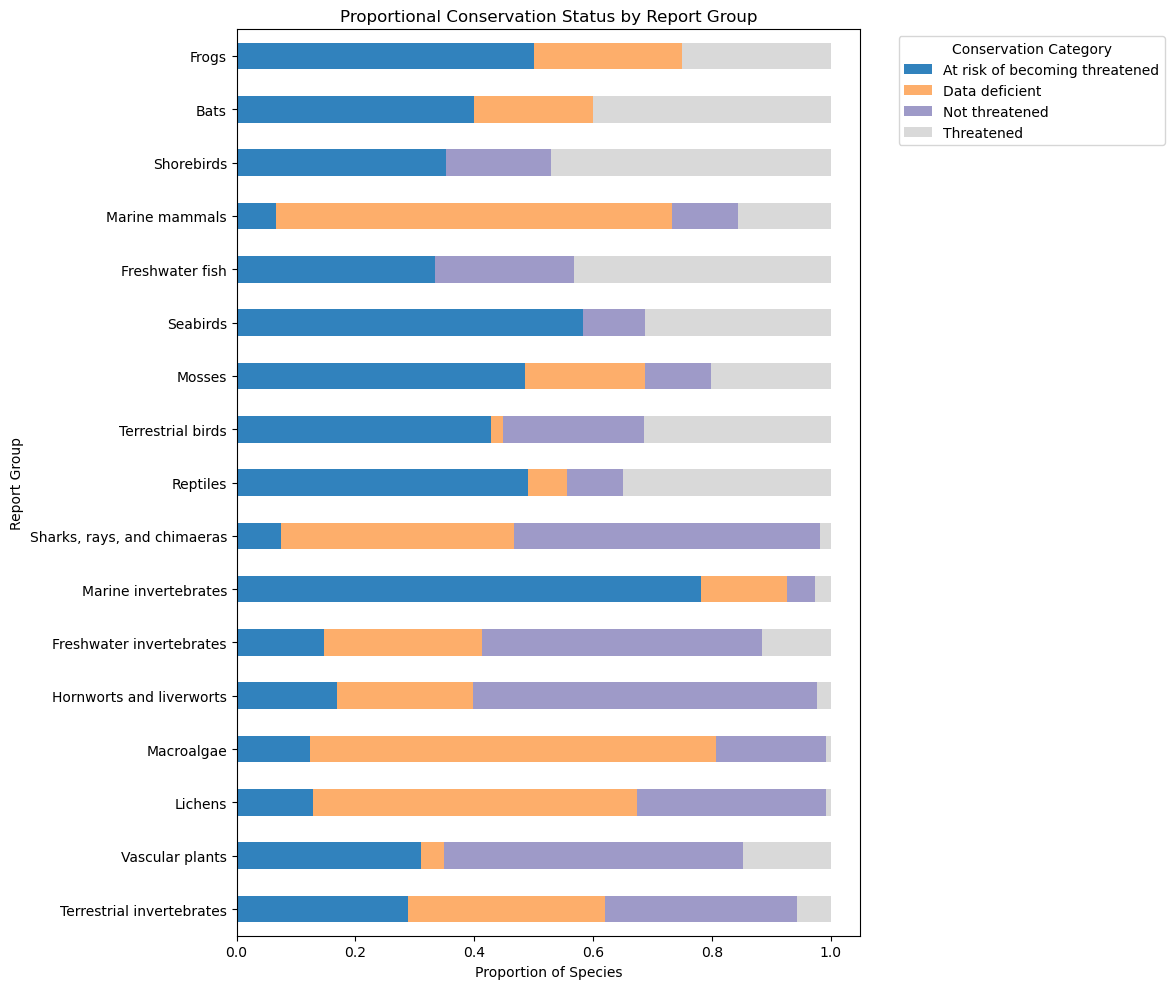

In [417]:
group_summary = df.groupby(['report_group', 'category']).size().unstack().fillna(0)

# sort by total species per group
group_summary = group_summary.loc[group_summary.sum(axis=1).sort_values(ascending=False).index]

# convert counts to proportions per report group
group_proportions = group_summary.div(group_summary.sum(axis=1), axis=0)

group_proportions.plot(kind='barh', stacked=True, figsize=(12, 10), colormap='tab20c')
plt.title("Proportional Conservation Status by Report Group")
plt.xlabel("Proportion of Species")
plt.ylabel("Report Group")
plt.legend(title="Conservation Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [418]:
import plotly.express as px

taxo_data = df[['kingdom', 'phylum', 'class', 'order', 'category']].dropna()

fig = px.sunburst(
    taxo_data,
    path=['kingdom', 'phylum', 'class', 'order', 'category'],
    title='Species Risk Across the Taxonomic Tree',
    color='category',
    color_discrete_map={
        'Not threatened': 'green',
        'At risk of becoming threatened': 'orange',
        'Threatened': 'red',
        'Data deficient': 'gray'
    },
    width=1000,
    height=800
)

fig.show()

fig.write_html("taxonomic_breakdown_sunburst_chart.html")

In [419]:
import pandas as pd

# species that are declining or have low trend confidence
declining_or_uncertain = df[
    (df['population_trend'] == 'Decreasing') |
    (df['trend_confidence'] == 'Low')
]

# select only relevant columns
highlight_species = declining_or_uncertain[
    ['common_name', 'species_name', 'category', 'domain', 'population_trend', 'trend_confidence', 'pop_size']
]

highlight_species = highlight_species.sort_values(by=['category', 'trend_confidence'])

# Show the top 20 species
highlight_species.head(20)


,common_name,species_name,category,domain,population_trend,trend_confidence,pop_size
18,Looper moth,Hydriomena,At risk of becoming threatened,Land,Decreasing,High,AREA<=10000
275,Yellow mistletoe,Alepis,At risk of becoming threatened,Land,Decreasing,High,MATIND>100000
664,North Island brown kiwi,Apteryx,At risk of becoming threatened,Land,Decreasing,High,MATIND=20000-100000
919,Looper moth,Austrocidaria,At risk of becoming threatened,Land,Decreasing,High,AREA<=1000
1667,Berggren's Sedge,Carex,At risk of becoming threatened,Land,Decreasing,High,AREA>10000
1795,Dwarf broom,Carmichaelia,At risk of becoming threatened,Land,Decreasing,High,MATIND>100000
1848,Limpet,Cellana,At risk of becoming threatened,Marine,Decreasing,High,AREA<=1000
2610,Sand coprosma,Coprosma,At risk of becoming threatened,Land,Decreasing,High,MATIND>100000
2665,Wall's coprosma,Coprosma,At risk of becoming threatened,Land,Decreasing,High,MATIND=5000-20000
3041,Looper moth,Dasyuris,At risk of becoming threatened,Land,Decreasing,High,AREA<=1000


In [420]:
threatened = df[df['category'] == 'Threatened']

In [421]:
top_families = threatened['family'].value_counts().nlargest(15)

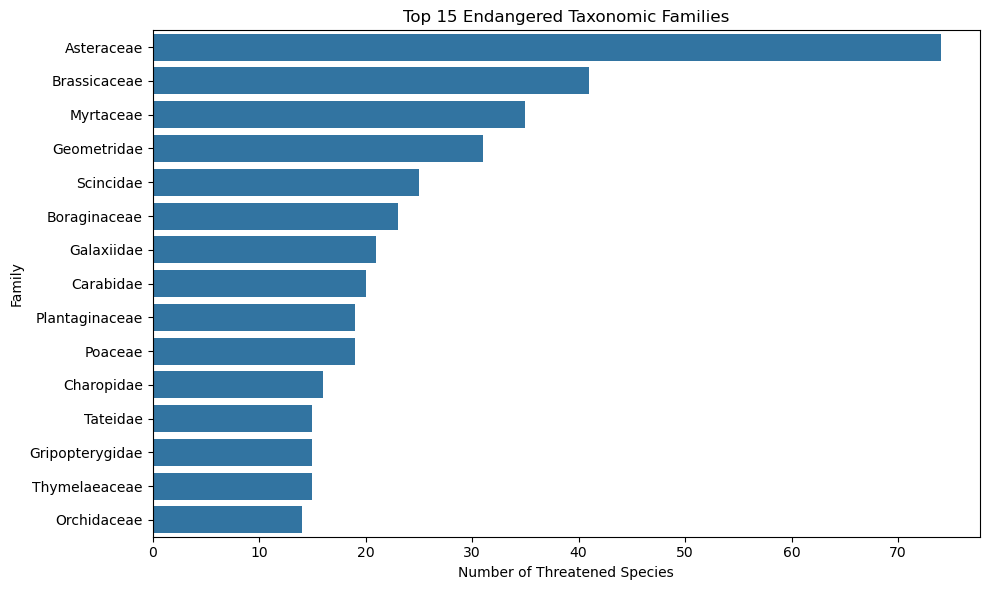

In [422]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_families.values, y=top_families.index)
plt.title("Top 15 Endangered Taxonomic Families")
plt.xlabel("Number of Threatened Species")
plt.ylabel("Family")
plt.tight_layout()
plt.show()

In [423]:
threat_trend = df[df['category'] == 'Threatened']['report_group_year'].value_counts()

threat_trend.index = threat_trend.index.str.extract(r'(\d{4})')[0].astype(int)

threat_trend = threat_trend.groupby(threat_trend.index).sum().sort_index()

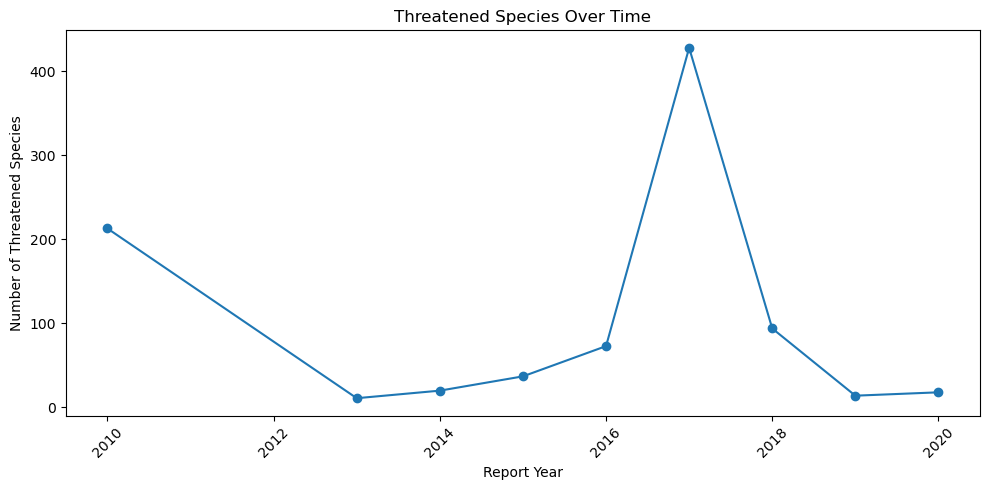

In [424]:
plt.figure(figsize=(10, 5))
threat_trend.plot(kind='line', marker='o')
plt.title("Threatened Species Over Time")
plt.xlabel("Report Year")
plt.ylabel("Number of Threatened Species")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [425]:
domain_risk = pd.crosstab(df['domain'], df['category'])

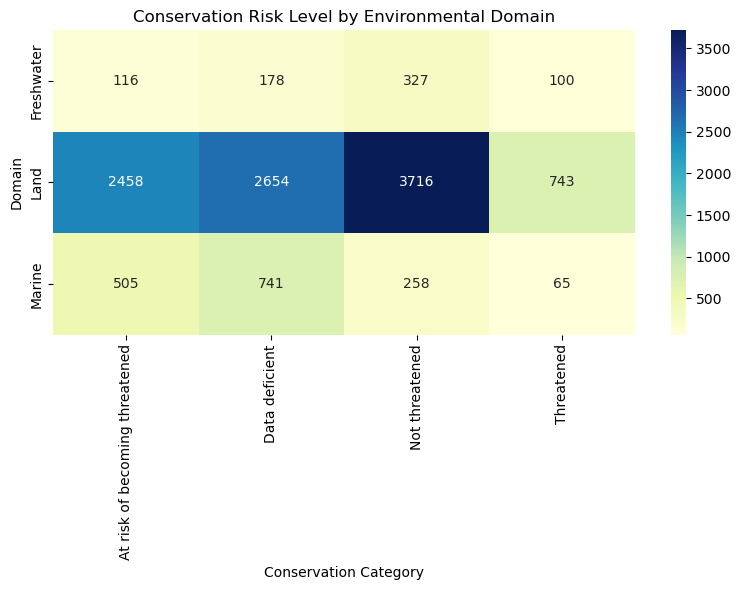

In [426]:
plt.figure(figsize=(8,6))
sns.heatmap(domain_risk, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Conservation Risk Level by Environmental Domain")
plt.ylabel("Domain")
plt.xlabel("Conservation Category")
plt.tight_layout()
plt.show()

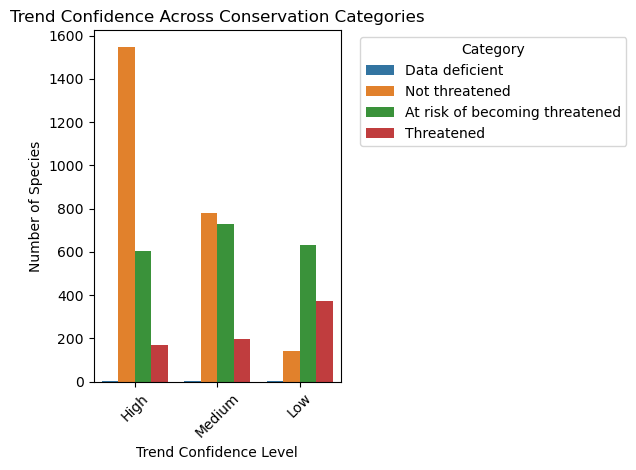

In [427]:
sns.countplot(data=df, x='trend_confidence', hue='category')
plt.title("Trend Confidence Across Conservation Categories")
plt.xlabel("Trend Confidence Level")
plt.ylabel("Number of Species")
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [428]:
df['assessment_year'] = df['report_group_year'].str.extract(r'(\d{4})')[0].astype(int)

timeline = df.groupby(['assessment_year', 'category']).size().unstack().fillna(0)

timeline = timeline.sort_index()

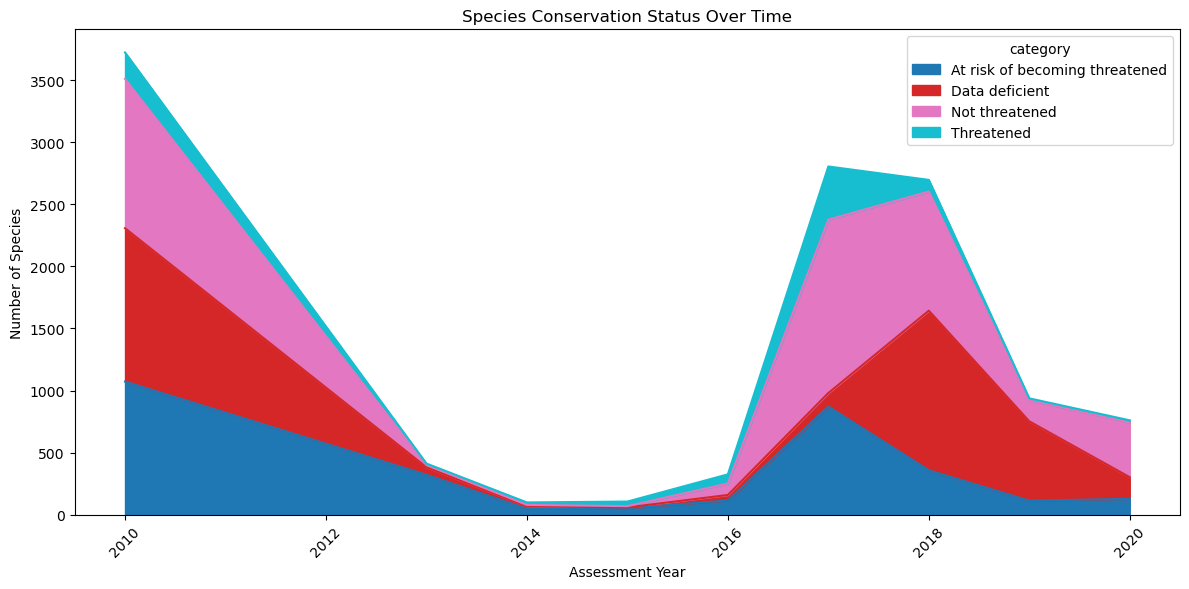

In [429]:
timeline.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title("Species Conservation Status Over Time")
plt.xlabel("Assessment Year")
plt.ylabel("Number of Species")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [430]:
data_def = df['category'].apply(lambda x: 'Data deficient' if x == 'Data deficient' else 'Assessed')
counts = data_def.value_counts()

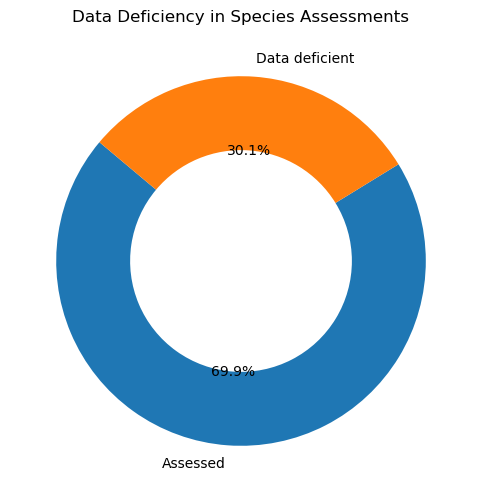

In [431]:
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title("Data Deficiency in Species Assessments")
plt.show()

In [432]:
#1 = Threatened, 0 = Not Threatened
df['threatened_binary'] = df['category'].apply(lambda x: 1 if 'Threatened' in str(x) else 0)

In [433]:
features = ['domain', 'kingdom', 'phylum', 'class', 'order', 'population_trend', 'trend_confidence', 'pop_size']
mod_df = df[features + ['threatened_binary']].dropna()

In [434]:
le = LabelEncoder()
for col in features:
    mod_df[col] = le.fit_transform(mod_df[col])

In [435]:
X = mod_df[features]
y = mod_df['threatened_binary']

In [436]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [437]:
importances = pd.Series(rf.feature_importances_, index=features)
importances = importances.sort_values(ascending=True)

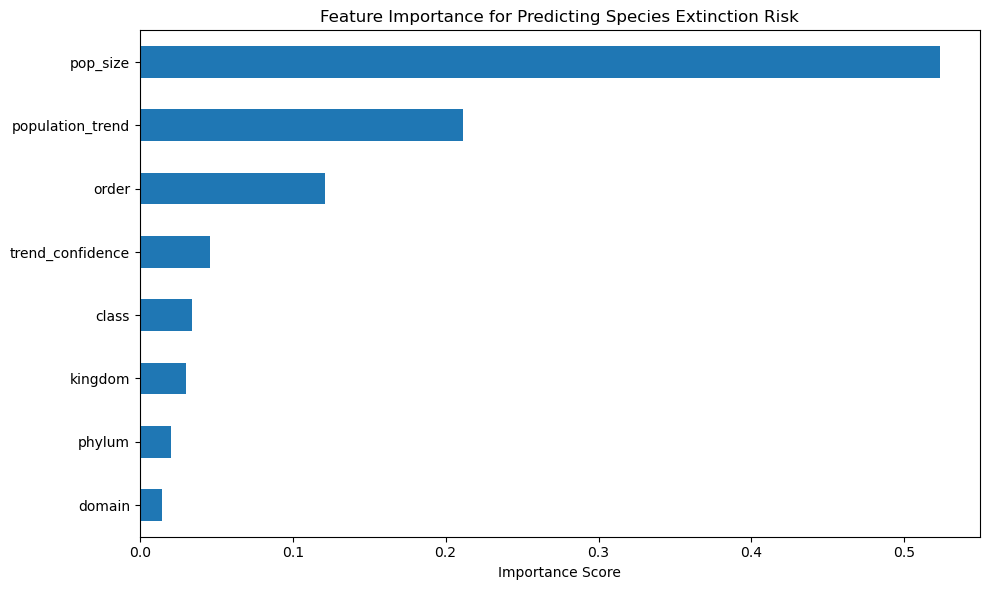

In [438]:
plt.figure(figsize=(10,6))
importances.plot(kind='barh')
plt.title("Feature Importance for Predicting Species Extinction Risk")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [439]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

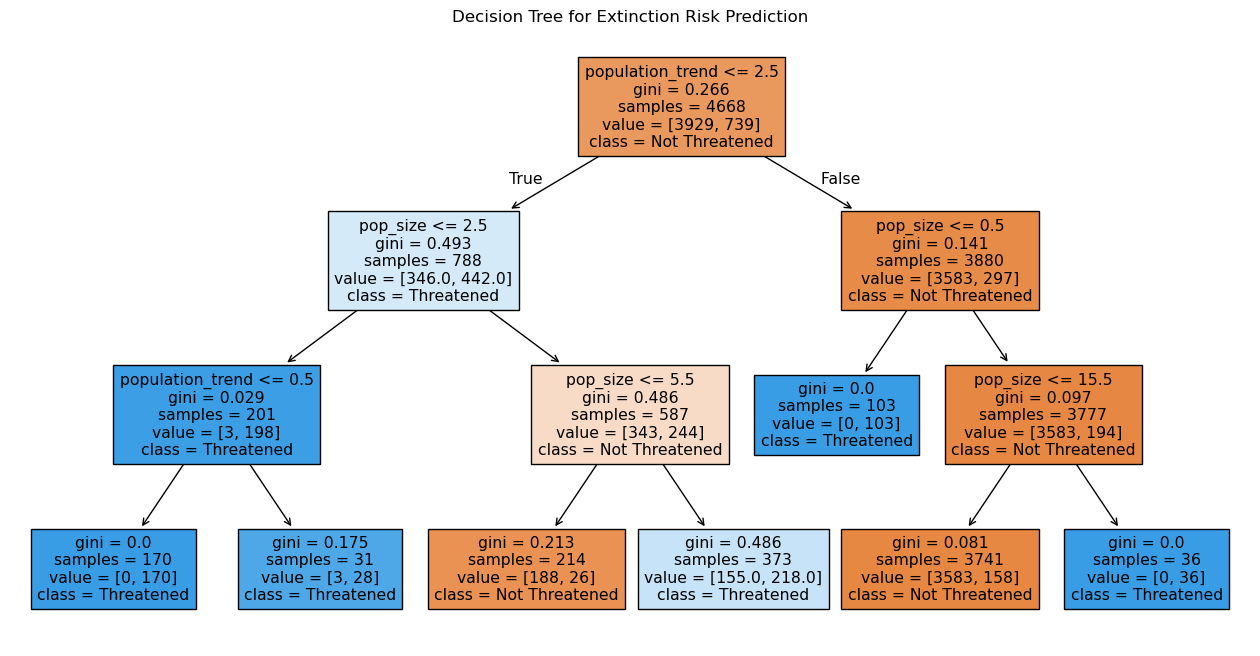

In [440]:
plt.figure(figsize=(16, 8))
plot_tree(dt, feature_names=features, class_names=["Not Threatened", "Threatened"], filled=True)
plt.title("Decision Tree for Extinction Risk Prediction")
plt.show()

In [441]:
threat_counts = df[df['category'] == 'Threatened'].groupby('domain').size()
total_counts = df.groupby('domain').size()
threat_rate = (threat_counts / total_counts).fillna(0)

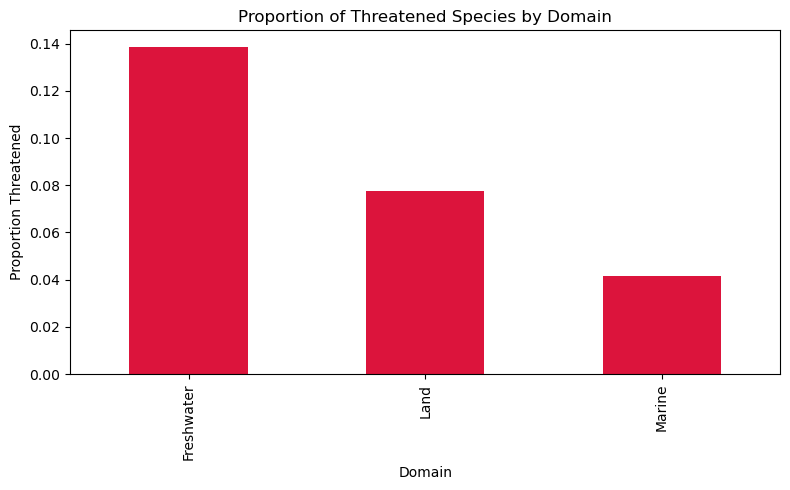

In [442]:
threat_rate.sort_values(ascending=False).plot(kind='bar', color='crimson', figsize=(8, 5))
plt.title("Proportion of Threatened Species by Domain")
plt.ylabel("Proportion Threatened")
plt.xlabel("Domain")
plt.tight_layout()
plt.show()